In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import pandas as pd

In [10]:
class OpenLorisDataset():
    """
    Pose Ground-Truth reader that conforms to the OpenLoris-Scene dataset format
    https://lifelong-robotic-vision.github.io/dataset/scene.html
    """
    
    # OpenLoris represents odometry as a 3x1 vector tx, ty, tz
    # and a quaternion qx, qy, qz, qw.
    OPENLORIS_COL_NAMES = [
        'time', 'tx', 'ty', 'tz',
        'qx', 'qy', 'qz', 'qw'
    ]

    OPENLORIS_ROT_COL_NAMES = [
        'qx', 'qy', 'qz', 'qw'
    ]

    OPENLORIS_R_VEC_COL_NAMES = ["x", "y", "z"]

    def read_file(self, input_file):
        poses = pd.read_csv(input_file, sep=' ', names=self.OPENLORIS_COL_NAMES)
        return poses

    def get_translations(self, poses, translation_axis):
        """
        Returns the translations for the given axis.
        """
        return poses[translation_axis].to_numpy()

    def get_angles(self, poses, rotation_axis):
        """
        Returns the angles as Euler angles for the given axis.
        """
        rotations = poses[self.OPENLORIS_ROT_COL_NAMES].to_numpy().reshape(len(poses), 4)
        rotations = R.from_quat(rotations)
        rotations = rotations.as_euler('xyz', degrees=True) #* 180 / 3.14 #rad to deg
        rotations = pd.DataFrame(rotations, columns=self.OPENLORIS_R_VEC_COL_NAMES)
        return rotations[rotation_axis].to_numpy()

In [8]:
dataset = OpenLorisDataset()

              time          tx         ty   tz   qx   qy        qz        qw
0     1.563004e+09 -125.106741 -15.132272  0.0  0.0  0.0  0.640510  0.767950
1     1.563004e+09 -125.105139 -15.112141  0.0  0.0  0.0  0.641401  0.767206
2     1.563004e+09 -125.104187 -15.107445  0.0  0.0  0.0  0.641346  0.767251
3     1.563004e+09 -125.101239 -15.092500  0.0  0.0  0.0  0.641184  0.767387
4     1.563004e+09 -125.098273 -15.079239  0.0  0.0  0.0  0.640939  0.767592
...            ...         ...        ...  ...  ...  ...       ...       ...
8008  1.563004e+09 -126.298652 -18.006655  0.0  0.0  0.0 -0.664644 -0.747160
8009  1.563004e+09 -126.297383 -17.986521  0.0  0.0  0.0 -0.662440 -0.749115
8010  1.563004e+09 -126.295062 -17.968670  0.0  0.0  0.0 -0.660053 -0.751219
8011  1.563004e+09 -126.289222 -17.933191  0.0  0.0  0.0 -0.654639 -0.755942
8012  1.563004e+09 -126.286397 -17.923969  0.0  0.0  0.0 -0.653525 -0.756905

[8013 rows x 8 columns]
              time          tx        ty   tz   qx 

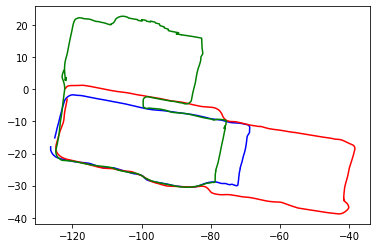

In [12]:
poses1 = dataset.read_file("D:\\datasets\\OpenLoris\\market1-1_3-package\\market1-1\\groundtruth.txt")
poses2 = dataset.read_file("D:\\datasets\\OpenLoris\\market1-1_3-package\\market1-2\\groundtruth.txt")
poses3 = dataset.read_file("D:\\datasets\\OpenLoris\\market1-1_3-package\\market1-3\\groundtruth.txt")    

translation_axis = ["tx", "ty"]
translations1 = dataset.get_translations(poses1, translation_axis)
translations2 = dataset.get_translations(poses2, translation_axis)
translations3 = dataset.get_translations(poses3, translation_axis)


x1 = translations1[:, [0]]
y1 = translations1[:, [1]]

x2 = translations2[:, [0]]
y2 = translations2[:, [1]]

x3 = translations3[:, [0]]
y3 = translations3[:, [1]]

#plot the poses
plt.plot(x1, y1, color = "blue")
plt.plot(x2, y2, color = "red")
plt.plot(x3, y3, color = "green")